# Random Forest training

### First fit of the model

In [85]:
import pandas as pd
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import validation_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [15]:
df_train = pd.read_csv("data/data_train.csv")
df_train

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,0,77516,0,13,0,0,0,0,0,2174,0,40,0,0
1,50,1,83311,0,13,1,1,1,0,0,0,0,13,0,0
2,38,2,215646,1,9,2,2,0,0,0,0,0,40,0,0
3,53,2,234721,2,7,1,2,1,1,0,0,0,40,0,0
4,28,2,338409,0,13,1,3,2,1,1,0,0,40,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,257302,6,12,1,10,2,0,1,0,0,38,0,0
32557,40,2,154374,1,9,1,9,1,0,0,0,0,40,0,1
32558,58,2,151910,1,9,6,0,4,0,1,0,0,40,0,0
32559,22,2,201490,1,9,0,0,3,0,0,0,0,20,0,0


In [16]:
X_train = df_train.drop("income", axis=1)
y_train = df_train["income"]

In [17]:
df_test = pd.read_csv("data/data_test.csv")
df_test

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,2,226802,2,7,0,9,3,1,0,0,0,40,0,0
1,38,2,89814,1,9,1,8,1,0,0,0,0,50,0,0
2,28,4,336951,6,12,1,12,1,0,0,0,0,40,0,1
3,44,2,160323,5,10,1,9,1,1,0,7688,0,40,0,1
4,18,5,103497,5,10,0,11,3,0,1,0,0,30,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,2,215419,0,13,2,3,0,0,1,0,0,36,0,0
16277,64,5,321403,1,9,6,11,5,1,0,0,0,40,0,0
16278,38,2,374983,0,13,1,3,1,0,0,0,0,50,0,0
16279,44,2,83891,0,13,2,0,3,2,0,5455,0,40,0,0


In [18]:
X_test = df_test.drop("income", axis=1)
y_test = df_test["income"]

In [72]:
model = RandomForestClassifier()

In [73]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [74]:
model.score(X_train, y_train)

0.9999385768250361

In [75]:
model.score(X_test, y_test)

0.8551686014372581

### Hyper parameter tuning

In [33]:
param_rf = {
    "n_estimators" : [100, 200, 400],
    "max_depth": [4, 8, 12, None],
    "max_features" : ["log2", "sqrt", "auto", None],
    "oob_score" : [True, False]
}

In [34]:
grid = GridSearchCV(estimator= RandomForestClassifier(),
                        param_grid= param_rf,
                        cv= 3,
                        scoring= 'accuracy',
                        n_jobs= -1,
                        verbose= 10)
result = grid.fit(X_train, y_train)

Fitting 3 folds for each of 96 candidates, totalling 288 fits


AttributeError: 'GridSearchCV' object has no attribute 'bestparams'

In [41]:
print(result.best_params_, result.best_score_)

{'max_depth': 12, 'max_features': None, 'n_estimators': 400, 'oob_score': True} 0.8638556701473177


#### Validation Curve

In [47]:
train_scoreNum, test_scoreNum = validation_curve(
                                RandomForestClassifier(),
                                X = X_train, y = y_train, 
                                param_name = 'n_estimators', 
                                param_range = [100, 200], cv = 3)

In [49]:
test_scoreNum

array([[0.85010135, 0.85866961, 0.86040726],
       [0.85369449, 0.86005159, 0.86013084]])

### ROC curve

In [77]:
model = RandomForestClassifier(max_depth=12,
                               max_features=None,
                               n_estimators=400,
                               oob_score=True
                              )

In [78]:
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=12, max_features=None, n_estimators=400,
                       oob_score=True)

In [79]:
probs = model.predict_proba(X_test)

probs = probs[:, 1]

Text(0.5, 1.0, 'ROC curve')

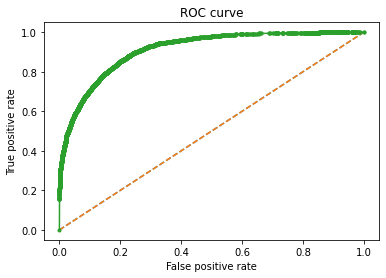

In [80]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, probs, drop_intermediate = True)

plt.plot([(0,0), (1,1)], linestyle="--")
plt.plot(false_positive_rate, true_positive_rate, marker=".")

plt.xlabel("False positive rate")
plt.ylabel("True positive rate")

plt.title("ROC curve")

In [87]:
all_accuracies = cross_val_score(estimator=model, X=X_train, y=y_train, cv=5)
print("The mean generalization accuracy of the model is {:.2f}% (+/- {:.2f}%)".format(np.mean(all_accuracies) * 100, np.std(all_accuracies) * 100))

array([0.85644096, 0.86164005, 0.86547912, 0.86640049, 0.86517199])